In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Fraud_Prediction_preprocessed.csv")

In [3]:
dataset

,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Transaction_Month,Card_Age_Years
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,883.17,Biometric,0.8494,0,0,August,5 to 10
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,2203.36,Password,0.0959,0,1,June,10+
2,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,1909.29,Biometric,0.8400,0,1,June,10+
3,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,1311.86,OTP,0.7935,0,1,December,5 to 10
4,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,966.98,Password,0.3819,1,1,November,10+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,Online,2023-01-29 18:38:00,76960.11,Mobile,Tokyo,Clothing,0,0,2,389.00,3,Amex,1537.54,PIN,0.1493,1,0,January,5 to 10
49996,126.15,POS,2023-05-09 08:55:00,28791.75,Mobile,Tokyo,Clothing,0,0,13,434.95,4,Visa,2555.72,Biometric,0.3653,0,1,May,5 to 10
49997,72.02,Online,2023-01-30 19:32:00,29916.41,Laptop,Mumbai,Clothing,0,1,1,369.15,2,Visa,4686.59,Biometric,0.5195,0,0,January,5 to 10
49998,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,Mobile,Tokyo,Electronics,0,0,13,242.29,4,Discover,4886.92,Biometric,0.7063,0,1,March,5 to 10


In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Fraud_Label ~ IP_Address_Flag*Risk_Score',data=dataset).fit()
sm.stats.anova_lm(model,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
IP_Address_Flag,1.0,0.099953,0.099953,0.538470,0.463071
Risk_Score,1.0,1623.187969,1623.187969,8744.462269,0.000000
IP_Address_Flag:Risk_Score,1.0,0.251035,0.251035,1.352378,0.244868
Residual,49996.0,9280.491263,0.185625,NaN,NaN


Risk_Score pValue is less than 0.05 which means the result does possess a statistically significant effect on fraud_Label. 
IP_Address_Flag pValue is greater than 0.05 which means the result does not possess a statistically significant effect on Fraud_Label. 
pValue for the interaction effect is greater than 0.05 which means there is no significant interaction between Risk_Score and IP_Address_Flag.

<Axes: xlabel='IP_Address_Flag', ylabel='count'>

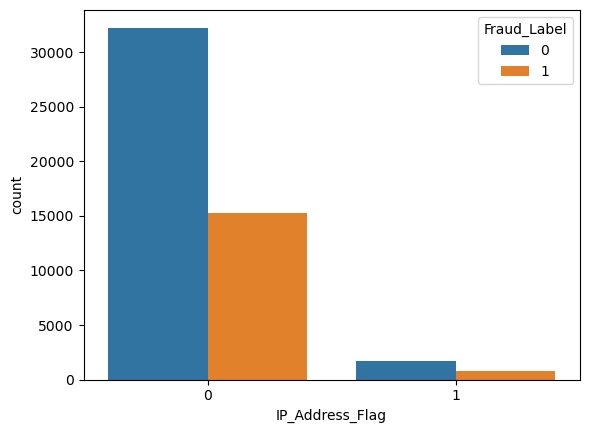

In [5]:
import seaborn as sb
sb.countplot(x='IP_Address_Flag',data=dataset,hue='Fraud_Label')

<Axes: xlabel='Previous_Fraudulent_Activity', ylabel='count'>

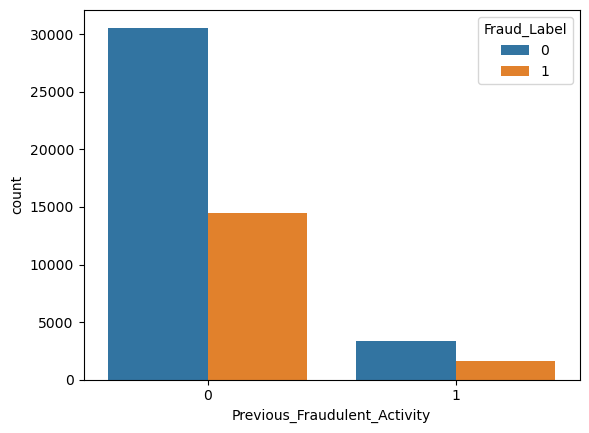

In [6]:
sb.countplot(x='Previous_Fraudulent_Activity',data=dataset,hue='Fraud_Label')


<Axes: xlabel='Is_Weekend', ylabel='count'>

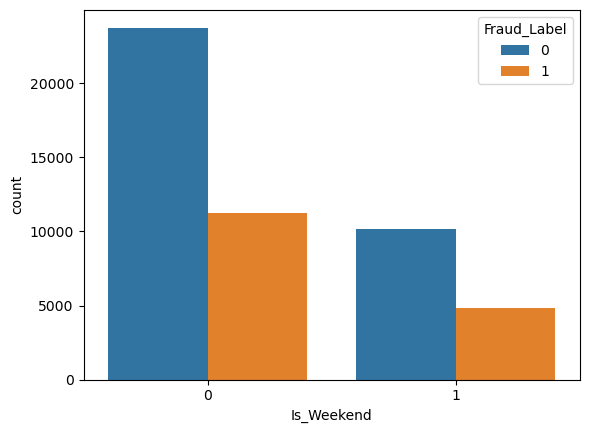

In [7]:
sb.countplot(x='Is_Weekend',data=dataset,hue='Fraud_Label')


In [8]:
dataset.columns

Index(['Transaction_Amount', 'Transaction_Type', 'Timestamp',
       'Account_Balance', 'Device_Type', 'Location', 'Merchant_Category',
       'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Transaction_Distance',
       'Authentication_Method', 'Risk_Score', 'Is_Weekend', 'Fraud_Label',
       'Transaction_Month', 'Card_Age_Years'],
      dtype='object')

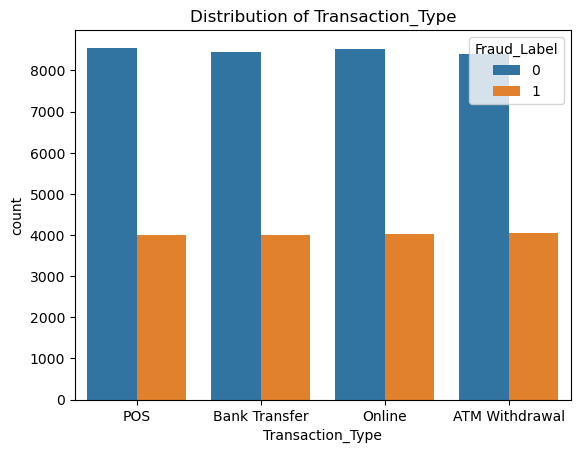

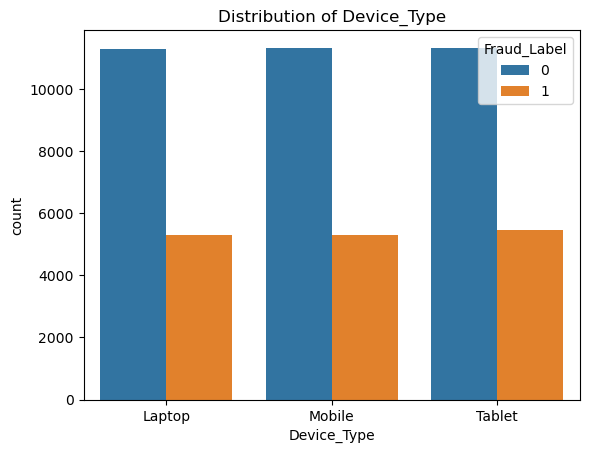

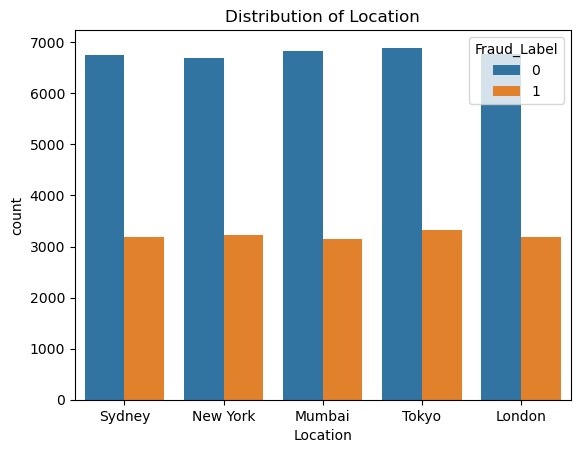

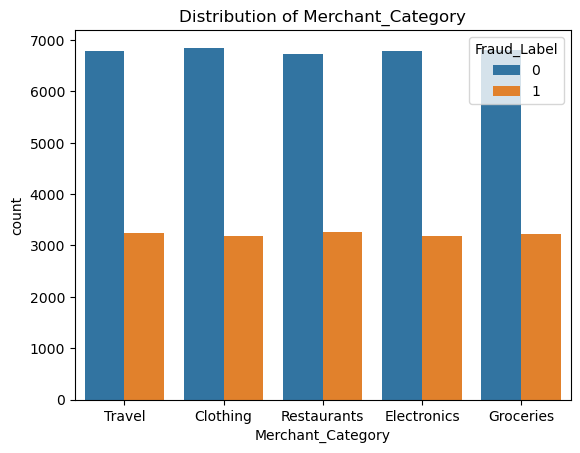

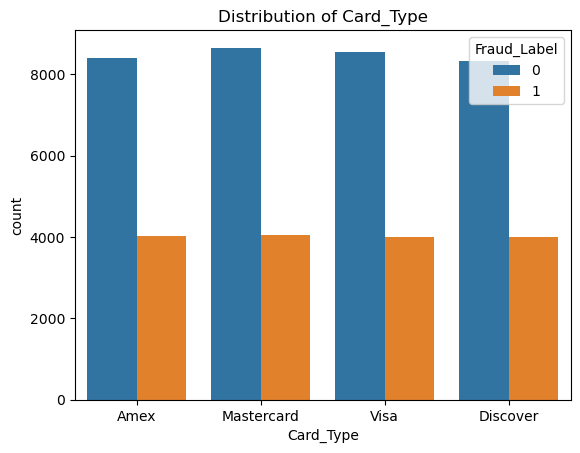

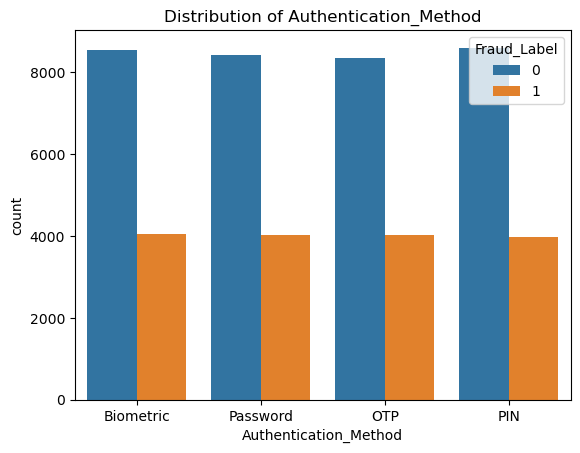

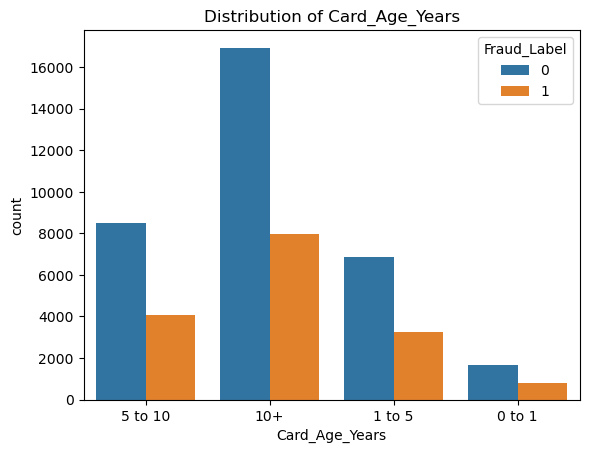

In [9]:
import matplotlib.pyplot as plt
qual=dataset[['Transaction_Type','Device_Type','Location','Merchant_Category','Card_Type','Authentication_Method','Card_Age_Years']]
for col in qual:
    plt.title(f"Distribution of {col}")
    sb.countplot(x=col, data=dataset, hue=dataset['Fraud_Label'])
    plt.show()

Takeaways from the graphs:

1. In general, the total Number of transactions is on higher side in the cards which are in use for more than 10 years and less in the cards which are in use for less than a year.
2. The percentage of fraudulent transactions to the total number of transactions are same irrespective of card type, device type, transaction type, Merchant category, location and authentication method because of which it is not possible to conclude the reason/pattern of the fraudulent transactions.
3. As seen from the analysis, it is not possible to conclude any significant relationship between the independent variables and the target variable.

<Axes: xlabel='Fraud_Label', ylabel='Risk_Score'>

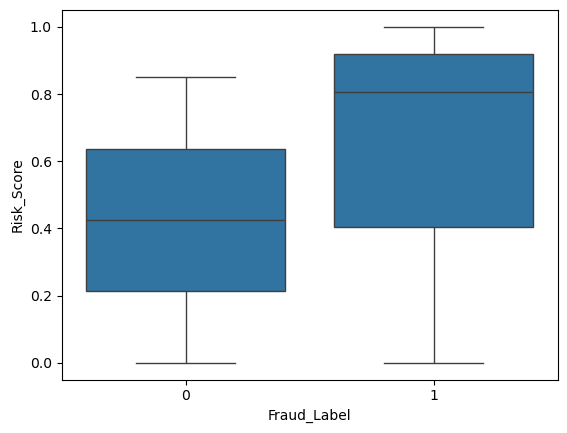

In [10]:
sb.boxplot(x='Fraud_Label',y='Risk_Score',data=dataset)


Greater the risk score, the higher the possibility of the fraudulent transaction to occur.
Almost 90% of the fraudulent transactions are with the Risk_Score greater than 0.4.

1. Which location has the highest number of fraud transactions?

In [12]:
Location_df = dataset[dataset['Fraud_Label'] == 1]['Location'].value_counts().reset_index()
Location_df.rename(columns={'count':'Number of Fraudulent transactions'},inplace=True)

In [13]:
Location_df

,Location,Number of Fraudulent transactions
0,Tokyo,3315
1,New York,3221
2,Sydney,3194
3,London,3181
4,Mumbai,3156


2. Which transaction type has the highest number of fraud transactions?

In [14]:
Transaction_df = dataset[dataset['Fraud_Label'] == 1]['Transaction_Type'].value_counts().reset_index()
Transaction_df.rename(columns={'count':'Number of Fraudulent transactions'},inplace=True)

In [15]:
Transaction_df

,Transaction_Type,Number of Fraudulent transactions
0,ATM Withdrawal,4046
1,Online,4031
2,Bank Transfer,3995
3,POS,3995


3. Which month has the highest number of fraud transactions?

In [16]:
Month_df = dataset[dataset['Fraud_Label'] == 1]['Transaction_Month'].value_counts().reset_index()
Month_df.rename(columns={'count':'Number of Fraudulent transactions'},inplace=True)
Month_df

,Transaction_Month,Number of Fraudulent transactions
0,August,1434
1,December,1396
2,January,1386
3,March,1360
4,July,1354
5,June,1347
6,October,1343
7,May,1315
8,April,1310
9,November,1301


4. Which merchant category has the highest number of fraud transactions?

In [17]:
Merchant_df = dataset[dataset['Fraud_Label'] == 1]['Merchant_Category'].value_counts().reset_index()
Merchant_df.rename(columns={'count':'Number of Fraudulent transactions'},inplace=True)
Merchant_df

,Merchant_Category,Number of Fraudulent transactions
0,Restaurants,3255
1,Travel,3235
2,Groceries,3217
3,Clothing,3181
4,Electronics,3179


5. Find the relationship between Failed transaction count and the fraud transactions.

In [18]:
FailedTxn_df = dataset[dataset['Fraud_Label'] == 1]['Failed_Transaction_Count_7d'].value_counts().reset_index()
FailedTxn_df.rename(columns={'count':'Number of Fraudulent transactions'},inplace=True)
FailedTxn_df

,Failed_Transaction_Count_7d,Number of Fraudulent transactions
0,4,9954
1,3,1601
2,0,1542
3,1,1531
4,2,1439


We can see that there is an occurrence of fraudulent transaction in the card profile with a greater number of failed transactions.